In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df= pd.read_csv('/content/Papollo-Healtcare-Dataset.csv')
df.head()

,Patient_ID,Admit_Date,Discharge_Date,Diagnosis,Bed_Occupancy,Test,Doctor,Followup Date,Feedback,Billing Amount,Health Insurance Amount
0,23571,12/31/2022,1/12/2023,Viral Infection,General,MRI,Jay Sinha,1/20/2023,5.0,13234,11911
1,27781,1/4/2023,1/12/2023,Typhoid,ICU,MRI,Jaya Yaadav,1/16/2023,4.0,12241,11017
2,24413,1/5/2023,1/12/2023,Malaria,General,CT Scan,Jay Sinha,1/15/2023,5.0,35255,31730
3,27360,1/5/2023,1/12/2023,Flu,Private,X-Ray,Jaya Yaadav,1/19/2023,5.0,6582,5924
4,26097,1/6/2023,1/12/2023,Viral Infection,General,Blood Test,Jaya Yaadav,2/6/2023,4.9,4567,4110


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7157 entries, 0 to 7156
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Patient_ID               7157 non-null   int64  
 1   Admit_Date               7157 non-null   object 
 2   Discharge_Date           7157 non-null   object 
 3   Diagnosis                7157 non-null   object 
 4   Bed_Occupancy            7157 non-null   object 
 5   Test                     7157 non-null   object 
 6   Doctor                   7157 non-null   object 
 7   Followup Date            7157 non-null   object 
 8   Feedback                 7157 non-null   float64
 9   Billing Amount           7157 non-null   int64  
 10  Health Insurance Amount  7157 non-null   int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 615.2+ KB


In [5]:
#create a list of numerical columns
num_cols=["Billing Amount","Health Insurance Amount"]

#printing summary statistics
df[num_cols].describe()

,Billing Amount,Health Insurance Amount
count,7157.000000,7157.000000
mean,26607.891854,23947.292162
std,25791.931009,23212.695899
min,1223.000000,1101.000000
25%,5454.000000,4909.000000
50%,12348.000000,11113.000000
75%,43522.000000,39170.000000
max,95867.000000,86280.000000


Billing Amount
Skew: 0.94


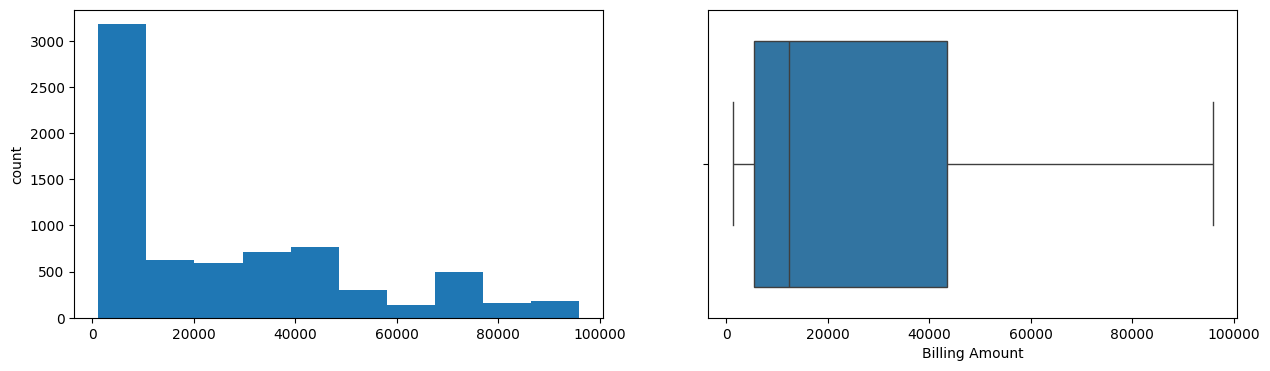

Health Insurance Amount
Skew: 0.94


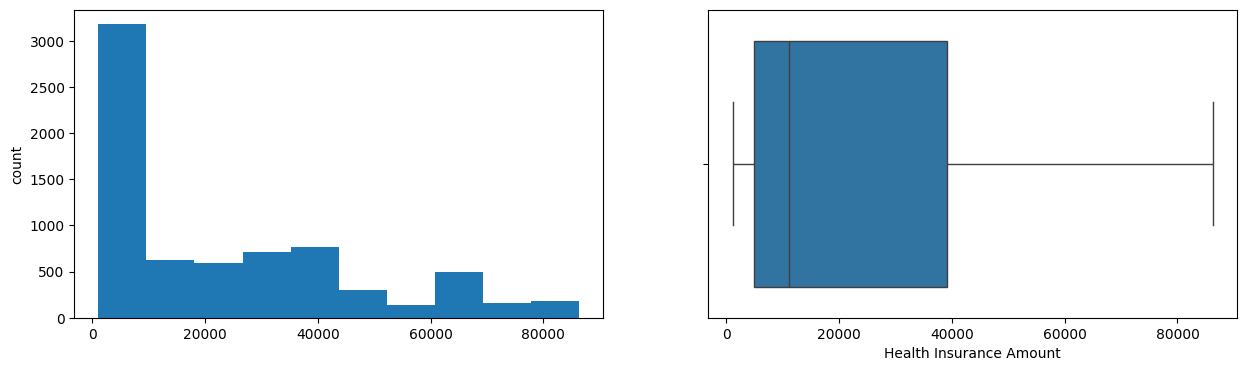

In [6]:
for col in ["Billing Amount","Health Insurance Amount"]:
  print(col)
  print('Skew:',round(df[col].skew(),2))
  plt.figure(figsize=(15,4))
  plt.subplot(1,2,1)
  df[col].hist(bins=10,grid=False)
  plt.ylabel('count')
  plt.subplot(1,2,2)
  sns.boxplot(x=df[col])
  plt.show()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7157 entries, 0 to 7156
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Patient_ID               7157 non-null   int64  
 1   Admit_Date               7157 non-null   object 
 2   Discharge_Date           7157 non-null   object 
 3   Diagnosis                7157 non-null   object 
 4   Bed_Occupancy            7157 non-null   object 
 5   Test                     7157 non-null   object 
 6   Doctor                   7157 non-null   object 
 7   Followup Date            7157 non-null   object 
 8   Feedback                 7157 non-null   float64
 9   Billing Amount           7157 non-null   int64  
 10  Health Insurance Amount  7157 non-null   int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 615.2+ KB


In [8]:
#creating list of categorical columns
cat_col=["Admit_Date","Discharge_Date","Diagnosis","Bed_Occupancy","Test", "Doctor", "Followup Date"]

for col in cat_col:
  print(df[col].value_counts(normalize=True))
  print('*'*40)#print the * 40 times to separate different variables

Admit_Date
1/20/2023     0.005170
1/17/2023     0.004331
1/24/2023     0.004192
1/19/2023     0.004052
1/21/2023     0.004052
                ...   
12/13/2022    0.000140
12/22/2022    0.000140
12/12/2022    0.000140
12/8/2022     0.000140
12/9/2022     0.000140
Name: proportion, Length: 456, dtype: float64
****************************************
Discharge_Date
1/26/2023     0.004052
1/20/2023     0.004052
1/28/2023     0.004052
1/27/2023     0.004052
1/25/2023     0.004052
                ...   
10/30/2023    0.001956
10/29/2023    0.001956
10/28/2023    0.001956
10/27/2023    0.001956
10/26/2023    0.001956
Name: proportion, Length: 421, dtype: float64
****************************************
Diagnosis
Viral Infection     0.280006
Flu                 0.239905
Malaria             0.199944
Typhoid             0.159983
Pneumonia           0.080061
Fracture            0.040101
Name: proportion, dtype: float64
****************************************
Bed_Occupancy
Private    0.50007
Gen

In [9]:
#Imputing missing values with mode for the categorical variables
for col in["Admit_Date","Discharge_Date","Diagnosis","Bed_Occupancy","Test", "Doctor", "Followup Date"]:
  df[col].fillna(value=df[col].mode()[0], inplace=True)

<ipython-input-9-efb733f67f5e>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(value=df[col].mode()[0], inplace=True)


In [10]:
#Cheking the null values
df.isnull().sum()

,0
Patient_ID,0
Admit_Date,0
Discharge_Date,0
Diagnosis,0
Bed_Occupancy,0
Test,0
Doctor,0
Followup Date,0
Feedback,0
Billing Amount,0


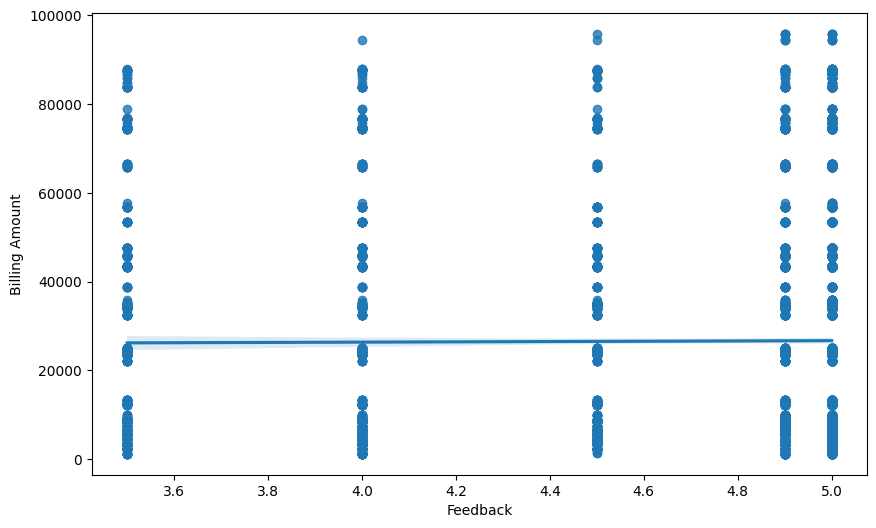

In [14]:
#lets check the relationship of Feedback with the Billing Amount
plt.figure(figsize=(10,6))
sns.regplot(x='Feedback', y='Billing Amount', data=df)
plt.show()

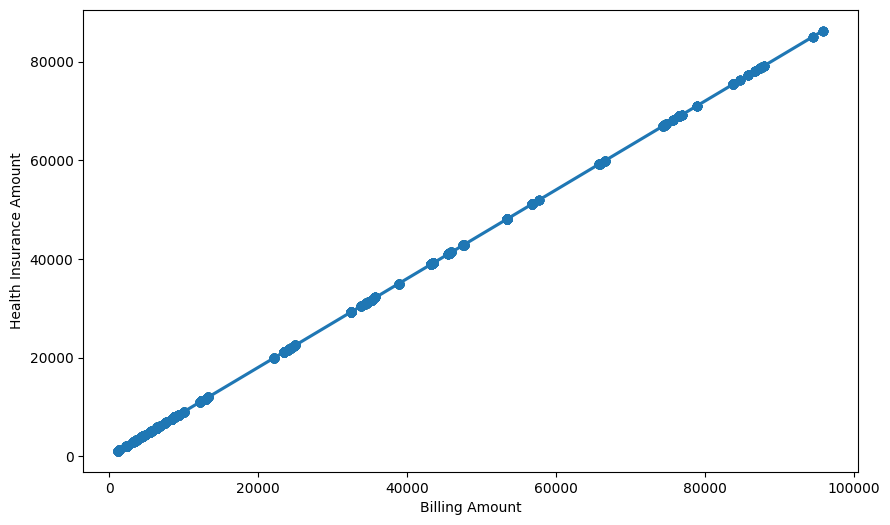

In [16]:
#lets check the relationship of Billing Amount with the Health Insurance Amount
plt.figure(figsize=(10,6))
sns.regplot(x='Billing Amount', y='Health Insurance Amount', data=df)
plt.show()

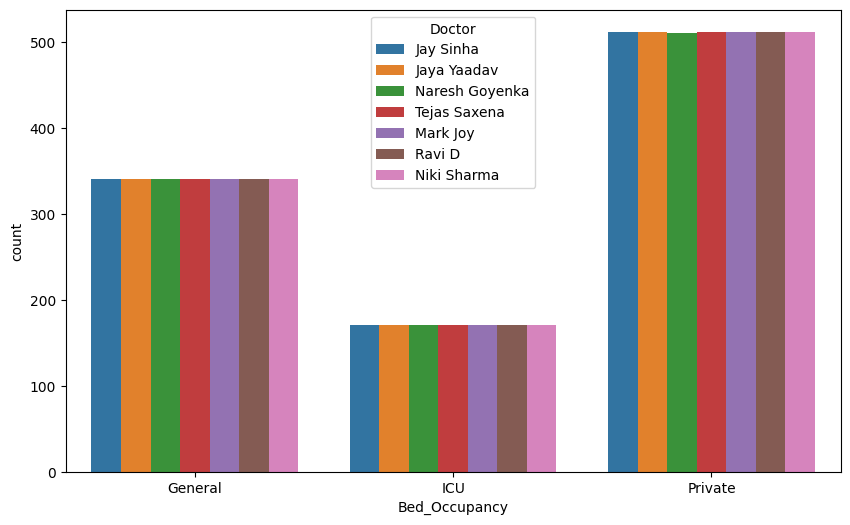

In [19]:
#lets check the relationship of Bed_Occupancy with the Doctor
plt.figure(figsize=(10,6))

sns.countplot(x='Bed_Occupancy', hue='Doctor', data=df) # Better for visualization
plt.show()